In [1]:
import sklearn
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE, ADASYN
import csv
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn import preprocessing
import random
import pandas as pd
import data
from utils import Config

from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import Perceptron

from sklearn import tree

In [2]:
def mean(numbers):
    return np.mean(numbers, axis = 0)

# Calculate the standard deviation of a list of numbers
def stdev(numbers):
#     avg = mean(numbers)
#     variance = sum([(x-avg)**2 for x in numbers]) / float(len(numbers)-1)
#     return math.sqrt(variance)
    numbers = np.std(numbers, axis=0)
    return numbers

In [3]:
features_data_points, total_index = data.getResult(Config['train'])

In [4]:
# features_data_points, total_index = getResult("D_train.csv")
def feature_selection(train_set, test_set):
        
    train_feature = [i[0:13] for i in train_set]
    train_label = [i[-1] for i in train_set]
    test_feature = [i[0:13] for i in test_set]
    test_label = [i[-1] for i in test_set]
    
    ##PCA
#     pca = PCA(n_components=13)
#     pca.fit(train_feature)
#     train_feature = pca.transform(train_feature)
#     test_feature = pca.transform(test_feature)

    ## selectkbest
    model = SelectKBest(k=8).fit(train_feature, train_label)
    train_feature = model.transform(train_feature)
    test_feature = model.transform(test_feature)
    
    return train_feature, train_label, test_feature, test_label

def labeled_dataset(train_feature, train_label, test_feature, test_label):
    train_data = np.column_stack((train_feature, train_label))
    test_data = np.column_stack((test_feature, test_label))
    return train_data, test_data

    
#split into k
def cross_split(dataset, folds):
    dataset_split = list()
    dataset_copy = list(dataset)

    for i in range(len(folds)):
        fold = list()
        for index in folds[i]:
            fold.append(dataset_copy[index])
        dataset_split.append(fold)
    return dataset_split

In [5]:
def evaluate_algorithm(dataset, algorithms, folds, *args):
    scores_crossvalidation = [[] for _ in range(7)]
    scores_training = [[] for _ in range(7)]
    
    datadset_split = cross_split(dataset, folds)
    for fold in datadset_split:
        for i in range(len(algorithms)):
            
            algorithm = algorithms[i]
            train_set = list(datadset_split)
            test_set = fold
            train_set.remove(fold)
            train_set = sum(train_set, [])
            accuracy, training_score, y_pred, test_label = algorithm(train_set, test_set)
            scores_training[i].append(training_score)
            scores_crossvalidation[i].append(accuracy)
    return scores_crossvalidation, scores_training

In [6]:
def SVC_model(train_set, test_set):
    train_feature, train_label, test_feature, test_label = feature_selection(train_set, test_set)
    model = SVC(C=1, gamma = 'auto', kernel='rbf')
#     model.fit(train_feature, train_label)
    y_pred = model.fit(train_feature, train_label).predict(test_feature)
    training_score = model.score(train_feature, train_label)
    acc = model.score(test_feature, test_label)
    return acc, training_score, y_pred, test_label

# scores = evaluate_algorithm(features_data_points, SVC_model, total_index)
# print(np.mean(scores, axis = 0))

In [7]:
def KNN_modell(train_set, test_set):
    train_feature, train_label, test_feature, test_label = feature_selection(train_set, test_set)    
    classifier = KNeighborsClassifier(n_neighbors=4)
#     classifier.fit(train_feature, train_label)
#     predicted = classifier.predict(test_feature)
#     accuracy = accuracy_metric(test_set, predicted)
    y_pred = classifier.fit(train_feature, train_label).predict(test_feature)
    training_score = classifier.score(train_feature, train_label)
    accuracy = classifier.score(test_feature, test_label)
    return accuracy, training_score,y_pred, test_label
    
# scores = evaluate_algorithm(features_data_points, KNN_modell, total_index)
# print(np.mean(scores, axis = 0))

In [8]:
def log_regression(train_set, test_set):
    train_feature, train_label, test_feature, test_label = feature_selection(train_set, test_set)
    logreg = LogisticRegression()
#     logreg.fit(train_feature, train_label)
    y_pred = logreg.fit(train_feature, train_label).predict(test_feature)
    training_score = logreg.score(train_feature, train_label)
    accuracy = logreg.score(test_feature, test_label)
    return accuracy, training_score, y_pred, test_label
    
# scores = evaluate_algorithm(features_data_points, log_regression, total_index)
# print(np.mean(scores, axis = 0))

In [9]:
def linear_discriminant(train_set, test_set):
    train_feature, train_label, test_feature, test_label = feature_selection(train_set, test_set)
    lda = LinearDiscriminantAnalysis()
#     lda.fit(train_feature, train_label)
    y_pred = lda.fit(train_feature, train_label).predict(test_feature)
    training_score = lda.score(train_feature, train_label)
    accuracy = lda.score(test_feature, test_label)
    return accuracy, training_score, y_pred, test_label

# scores = evaluate_algorithm(features_data_points, linear_discriminant, total_index)
# print(np.mean(scores, axis = 0))

In [10]:
def naive_bayes(train_set, test_set):
    train_feature, train_label, test_feature, test_label = feature_selection(train_set, test_set)
    gnb = GaussianNB()
    

    y_pred = gnb.fit(train_feature, train_label).predict(test_feature)

    training_score = gnb.score(train_feature, train_label)
    accuracy = gnb.score(test_feature, test_label)
    return accuracy, training_score, y_pred, test_label

# scores = evaluate_algorithm(features_data_points, naive_bayes, total_index)
# print(np.mean(scores, axis = 0))   

In [11]:
def perceptron(train_set, test_set):
    train_feature, train_label, test_feature, test_label = feature_selection(train_set, test_set)
    clf = Perceptron(tol=1e-3, random_state=0)
#     clf.fit(train_feature, train_label)
    y_pred = clf.fit(train_feature, train_label).predict(test_feature)
    training_score = clf.score(train_feature, train_label)
    accuracy = clf.score(test_feature, test_label)
    return accuracy, training_score,  y_pred, test_label

# scores = evaluate_algorithm(features_data_points, perceptron, total_index)
# print(np.mean(scores, axis = 0))

In [12]:
def decisionTree(train_set, test_set):
    train_feature, train_label, test_feature, test_label = feature_selection(train_set, test_set)
    clf = tree.DecisionTreeClassifier()
#     clf.fit(train_feature, train_label)
    y_pred = clf.fit(train_feature, train_label).predict(test_feature)
    training_score = clf.score(train_feature, train_label)
    accuracy = clf.score(test_feature, test_label)
    return accuracy, training_score, y_pred, test_label

# scores = evaluate_algorithm(features_data_points, decisionTree, total_index)
# print(np.mean(scores, axis = 0))

In [13]:
algorithms = [KNN_modell, SVC_model, log_regression, linear_discriminant, naive_bayes, perceptron, decisionTree]

crossvalidation_scores, training_scores  = evaluate_algorithm(features_data_points, algorithms,  total_index)
# print(scores)
training_scores = np.mean(training_scores, axis=1)

# print(scores)
scores = np.mean(crossvalidation_scores, axis=1)
print("all classifiers' accuracies are " + str(scores))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

all classifiers' accuracies are [0.84562963 0.946      0.83785185 0.81125926 0.83311111 0.78237037
 0.73851852]


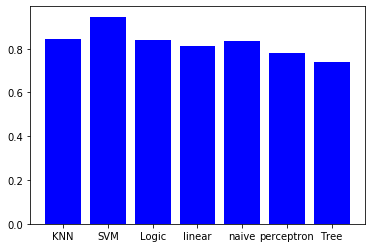

the best classfier is SVM
the test accuracy is 0.7856770463055122


In [14]:
def test(train, test, best_one):
    accuracy, training_score, y_pred, test_label = best_one(train, test)
    return accuracy, y_pred, test_label


# graph
name_list = ['KNN', 'SVM', 'Logic', 'linear', 'naive', 'perceptron', 'Tree']
plt.bar(range(len(scores)), scores, color='b', tick_label=name_list)
plt.show()

scores1 = scores.tolist()
index = scores1.index(max(scores))
print("the best classfier is " + str(name_list[index]))

# scores2 = evaluate_algorithm(dataset, svm_model, folds)
# print('Mean Accuracy: %.3f%%' % (np.mean(scores2, axis=0) * 100))
best_one = algorithms[index]
t, e = data.getResult(Config['test'])
accuracy, y_pred, test_label = test(features_data_points, t, KNN_modell)
print("the test accuracy is " + str(accuracy))

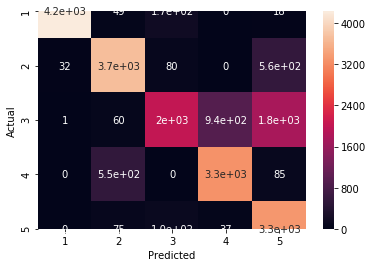

In [15]:
import seaborn as sn
# confusion matrix for test
# list1 = [2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0]
# list2 = [1, 1, 0, 1, 2, 1, 1, 0, 1, 0, 0, 0]
data = {'y_Actual': test_label, 'y_Predicted': y_pred}
df = pd.DataFrame(data, columns=['y_Actual', 'y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'],
                               df['y_Predicted'],
                               rownames=['Actual'],
                               colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)
plt.show()

In [16]:
#learning curve
data_size = []
each_user = []
for i in range(15):
    data_size.append((i+1)*900)
    each_user.append((i+1)*100)
data_size[0] = 90
each_user[0] = 10
# print(data_size)
# print(each_user)


# print(np.shape(features_data_points))
# print(np.shape(total_index))


feature_final_set = []
for size in each_user:
    final_data_points = []
    # for size in each_user:
    #     copy_features_data_points = np.array(features_data_points.copy())   
    for i in range(9):
        features_data = features_data_points[1500*i:1500*(i+1)]
        random.shuffle(features_data)
        data_points = features_data[0:size]
        final_data_points.append(data_points)

    final_points = []
    for final_data_point in final_data_points:
        for data_point in final_data_point:
            final_points.append(data_point)
#     print(np.shape(final_points))
    
    feature_final_set.append(final_points)

# print(np.shape(feature_final_set[1]))

index_final_set = []
for k in range(15):  
    index_final = []
    tmp = []
    for i in range(data_size[k]):
        if len(tmp) == each_user[k]: 
            index_final.append(tmp)
            tmp = []
        tmp.append(i)
    index_final.append(tmp)
    index_final_set.append(index_final)
#     print(np.shape(index_final))
    
# print(np.shape(index_final_set[1]))
# # print(index_final_set[1])

val_knn, val_svm, val_logic, val_linear, val_naive, val_perceptron, val_tree = [], [], [], [], [], [], []
train_knn, train_svm, train_logic, train_linear, train_naive, train_perceptron, train_tree = [], [], [], [], [], [], []

for i in range(15):    
    scores_val, scores_train = evaluate_algorithm(feature_final_set[i], algorithms,  index_final_set[i])
    # print(scores)
    scores_val = np.mean(scores_val, axis=1)
    val_knn.append(scores_val[0])
    val_svm.append(scores_val[1])
    val_logic.append(scores_val[2])
    val_linear.append(scores_val[3])
    val_naive.append(scores_val[4])
    val_perceptron.append(scores_val[5])
    val_tree.append(scores_val[6])
    
    scores_train = np.mean(scores_train, axis=1)
    train_knn.append(scores_train[0])
    train_svm.append(scores_train[1])
    train_logic.append(scores_train[2])
    train_linear.append(scores_train[3])
    train_naive.append(scores_train[4])
    train_perceptron.append(scores_train[5])
    train_tree.append(scores_train[6])



/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


KeyboardInterrupt: 

In [ ]:
plt.style.use('seaborn')
# plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(data_size, val_knn, label = 'Validation acc KNN', color='#ADD8E6')
plt.plot(data_size, val_svm,  label = 'Validation acc SVM', color='g')
plt.plot(data_size, val_logic,  label = 'Validation acc logic', color='r')
plt.plot(data_size, val_linear,  label = 'Validation acc linear', color='b')
plt.plot(data_size, val_naive,  label = 'Validation acc bayes', color='#7CFC00')
plt.plot(data_size, val_perceptron,  label = 'Validation acc perceptron', color='#B22222')
plt.plot(data_size,  val_tree, label = 'Validation acc Tree', color='#FFD700')

plt.ylabel('model accuracies', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for 7 models', fontsize = 18, y = 1.05)
plt.legend()
plt.ylim(0.5, 1)

In [ ]:
plt.style.use('seaborn')
# plt.plot(train_sizes, train_scores_mean, label = 'Training error')

plt.plot(data_size, val_svm,  label = 'Validation acc svm', color='b')
plt.plot(data_size,  train_svm, label = 'training acc svm', color='g')

plt.ylabel('model accuracies', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for svm model', fontsize = 18, y = 1.05)
plt.legend()
plt.ylim(0.6, 1.1)

In [ ]:
plt.style.use('seaborn')
# plt.plot(train_sizes, train_scores_mean, label = 'Training error')

plt.plot(data_size, val_tree,  label = 'Validation acc DecisionTree', color='b')
plt.plot(data_size,  train_tree, label = 'training acc DecisionTree', color='g')

plt.ylabel('model accuracies', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for DecisionTree model', fontsize = 18, y = 1.05)
plt.legend()
plt.ylim(0.6, 1.1)

In [ ]:
plt.style.use('seaborn')
# plt.plot(train_sizes, train_scores_mean, label = 'Training error')

plt.plot(data_size, val_naive,  label = 'Validation acc naiveBayes', color='b')
plt.plot(data_size,  train_naive, label = 'training acc naiveBayes', color='g')

plt.ylabel('model accuracies', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for naiveBayes model', fontsize = 18, y = 1.05)
plt.legend()
plt.ylim(0.6, 1.1)

In [ ]:
plt.style.use('seaborn')
# plt.plot(train_sizes, train_scores_mean, label = 'Training error')

plt.plot(data_size, val_logic,  label = 'Validation acc logicRegression', color='b')
plt.plot(data_size,  train_logic, label = 'training acc logicRegression', color='g')

plt.ylabel('model accuracies', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for logicRegression model', fontsize = 18, y = 1.05)
plt.legend()
plt.ylim(0.6, 1.1)

In [ ]:
feature_array = np.array(features_data_points)
print(feature_array.shape)
feature_maps = feature_array[:,:13]
import seaborn as sns
import pandas as pd

 
df = pd.DataFrame(feature_maps, columns=['length','x_mean', 'y_mean', 'z_mean', 'x_std','y_std','z_std','min_x','min_y','min_z','max_x','max_y', 'max_z'])


g=sns.FacetGrid(df)
g.map(plt.hist,"length")

g=sns.FacetGrid(df)
g.map(plt.hist,"x_mean")

g=sns.FacetGrid(df)
g.map(plt.hist,"y_mean")

g=sns.FacetGrid(df)
g.map(plt.hist,"z_mean")

g=sns.FacetGrid(df)
g.map(plt.hist,"x_std")

g=sns.FacetGrid(df)
g.map(plt.hist,"y_std")

g=sns.FacetGrid(df)
g.map(plt.hist,"z_std")

g=sns.FacetGrid(df)
g.map(plt.hist,"min_x")

g=sns.FacetGrid(df)
g.map(plt.hist,"min_y")

g=sns.FacetGrid(df)
g.map(plt.hist,"max_x")

g=sns.FacetGrid(df)
g.map(plt.hist,"max_y")

g=sns.FacetGrid(df)
g.map(plt.hist,"max_z")
 

